# Classification of Handwritten Digits

Example adapted from [scikit-learn docs](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)

In [23]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, and performance metrics
from sklearn import datasets, metrics

# Import the Multi-Layer Perceptron Classifier. This is the model we will train.
from sklearn.neural_network import MLPClassifier

In [24]:
# This is a seed for the random number generator, we set this to make
# reproducible results
seed = 42

In [25]:
# The handwritten digits dataset
digits = datasets.load_digits()

In [26]:
# Each image right now is an 8 x 8 matrix of grayscale pixel values
# Here we print the first image's pixel values.
print(digits.images[0])
print("\nHere are the dimensions of the first feature matrix: {}".format(digits.images[0].shape))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

Here are the dimensions of the first feature matrix: (8, 8)


In [27]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
print("Number of examples we have: {}".format(n_samples))

# Data is a list of vectors now, each vector is length 64, since the image dimensions are 8 x 8.
data = digits.images.reshape((n_samples, -1))

print("Here are the dimensions of the feature vectors stacked up together: {}".format(data.shape))

print("Here is the length of each feature vector X: {}".format(data[0].shape))

Number of examples we have: 1797
Here are the dimensions of the feature vectors stacked up together: (1797, 64)
Here is the length of each feature vector X: (64,)


In [28]:
# We need to now create our test and train splits

# We'll train on 70% of our data
train_size = int(n_samples * 0.70)
train_X = data[:train_size]
train_y = digits.target[:train_size]
print(len(train_X))

# The remaining samples are for our test set
test_size = n_samples - train_size
test_X = data[train_size:]
test_y = digits.target[train_size:]
print(len(test_X))

assert n_samples == (len(test_X) + len(train_X))

1257
540


# MLP: Multi-layer Perceptron Classifier
Read the [Docs](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

## TODO
You're going to test out the MLP with different parameters.

First, let's do different max iteration / epoch values. An epoch is an interation, so we can limit
the number of iterations and see it's effect on training / testing accuracy.

We'll plot it at the end.

In [29]:
epoch_counts = [5, 10, 20, 50, 100, 140, 200, 500, 1000, 2000] # We'll loop over this and set the MLP max iterations to this
classifiers = [] # Append your classifiers here after applying .fit() to them

train_accs = [] # Append train accuracies here
test_accs = [] # Append test accuracies here

In [38]:
for epoch_count in epoch_counts:
    # TODO: Use the epoch_count variable here, refer to MLP docs
    classifier = MLPClassifier(random_state=seed, max_iter=epoch_count)
    # TODO: Use the fit() function here
    classifier.fit(train_X, train_y)
    # TODO: Compute the accuracies below
    train_error = classifier.score(train_X, train_y)
    test_error = classifier.score(test_X, test_y)
    train_acc = train_error
    test_acc = test_error
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    
    # TODO: Append the accuracies to the respective lists

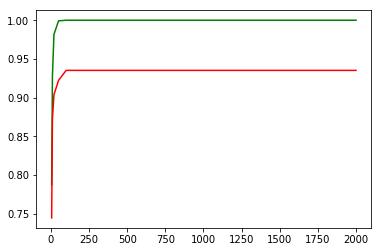

In [39]:
# Now let's plot the results
plt.plot(epoch_counts, train_accs, "g")
plt.plot(epoch_counts, test_accs, "r")

In [40]:
# If you're running this outside of Jupyter notebook,
# uncomment this next line.
# plt.show()